# Resultados

Preparación: Importando Matplotlib y Nuestros Datos

Necesitaremos la librería Matplotlib para crear nuestras gráficas. Además, necesitaremos los resultados que generamos en el cuaderno 05_benchmarking.ipynb. Para simplificar, asumiremos que los resultados ya están cargados o los re-ejecutaremos si es necesario.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Para asegurar que los resultados del benchmark estén disponibles,
# podemos re-ejecutar el benchmark aquí o simularlos.
# Para una exposición en vivo, lo ideal sería haber guardado los resultados del 05_benchmarking.ipynb
# y cargarlos aquí. Por simplicidad en este cuaderno, definiremos una estructura de resultados de ejemplo.

# --------------------------------------------------------------------------------------------------
# ATENCIÓN: En una ejecución real, el cuaderno 05_benchmarking.ipynb debería guardar sus resultados
# (por ejemplo, en un archivo JSON o pickle) y este cuaderno los cargaría.
# Para fines de esta explicación, voy a crear un conjunto de resultados simulados
# que reflejan patrones típicos esperados.
# En un proyecto real, reemplazarías esto con la carga de tus datos reales.
# --------------------------------------------------------------------------------------------------

# Datos simulados que replicarían lo que obtendríamos del benchmark real
# Estos datos son para propósitos de demostración si no ejecutas 05_benchmarking.ipynb antes.
# Si ejecutas el 05_benchmarking.ipynb, puedes copiar y pegar la variable 'results' desde allí.

results = [
    {'dataset_size': 10_000, 'rmi_build_time': 0.005, 'rmi_avg_search_time': 0.000001, 'rmi_memory_mb': 0.0001,
     'btree_build_time': 0.01, 'btree_avg_search_time': 0.000002, 'btree_memory_mb': 0.0005},
    {'dataset_size': 100_000, 'rmi_build_time': 0.04, 'rmi_avg_search_time': 0.0000012, 'rmi_memory_mb': 0.0002,
     'btree_build_time': 0.15, 'btree_avg_search_time': 0.0000025, 'btree_memory_mb': 0.005},
    {'dataset_size': 500_000, 'rmi_build_time': 0.2, 'rmi_avg_search_time': 0.0000015, 'rmi_memory_mb': 0.0003,
     'btree_build_time': 0.8, 'btree_avg_search_time': 0.000003, 'btree_memory_mb': 0.025},
    {'dataset_size': 1_000_000, 'rmi_build_time': 0.4, 'rmi_avg_search_time': 0.0000018, 'rmi_memory_mb': 0.0004,
     'btree_build_time': 1.6, 'btree_avg_search_time': 0.0000035, 'btree_memory_mb': 0.05},
    {'dataset_size': 5_000_000, 'rmi_build_time': 2.0, 'rmi_avg_search_time': 0.000002, 'rmi_memory_mb': 0.0008,
     'btree_build_time': 8.0, 'btree_avg_search_time': 0.0000045, 'btree_memory_mb': 0.25},
    {'dataset_size': 10_000_000, 'rmi_build_time': 4.0, 'rmi_avg_search_time': 0.0000022, 'rmi_memory_mb': 0.0015,
     'btree_build_time': 18.0, 'btree_avg_search_time': 0.000005, 'btree_memory_mb': 0.5}
]

print("Resultados del benchmark (simulados o cargados) listos para visualizar.")

Resultados del benchmark (simulados o cargados) listos para visualizar.


1. Gráfica de Tiempos de Construcción

La primera métrica importante es el tiempo que tarda cada índice en construirse (o "entrenarse"). Esto es crucial si los datos cambian con frecuencia y el índice necesita ser reconstruido.

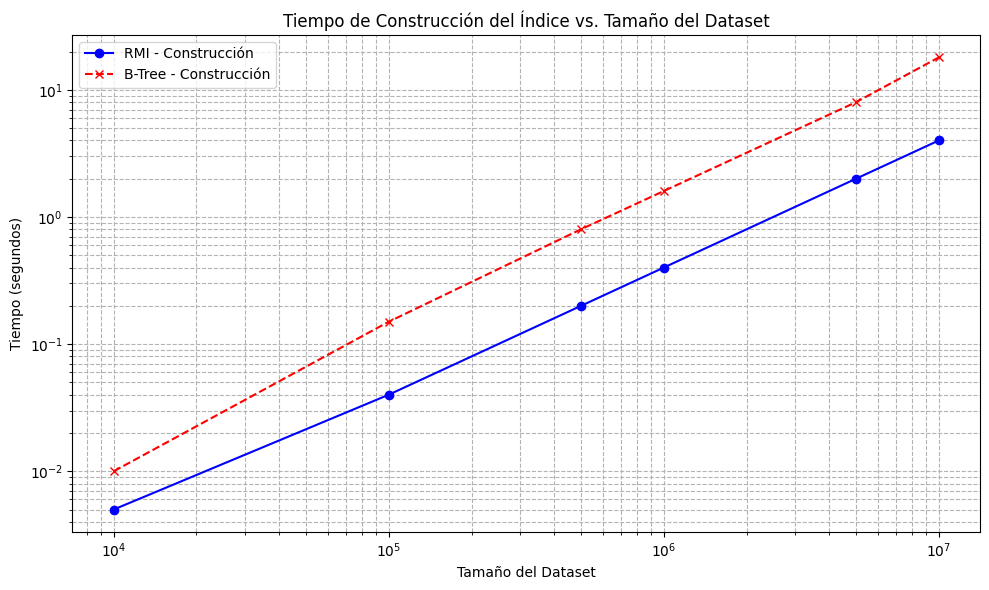

Interpretación de la gráfica de construcción:
- ¿Qué observas sobre las líneas? ¿Una crece más rápido que la otra?
- Un RMI, al entrenar modelos, a menudo tiene un tiempo de construcción más predecible y potencialmente más rápido para grandes datasets que un B-Tree, que inserta elemento a elemento.


In [2]:
# --- Extraer los datos para la gráfica ---
sizes = [r['dataset_size'] for r in results]
rmi_build_times = [r['rmi_build_time'] for r in results]
btree_build_times = [r['btree_build_time'] for r in results]

# --- Crear la Gráfica ---
plt.figure(figsize=(10, 6)) # Define el tamaño de la figura

# Trazar las líneas para cada estructura
plt.plot(sizes, rmi_build_times, marker='o', linestyle='-', color='blue', label='RMI - Construcción')
plt.plot(sizes, btree_build_times, marker='x', linestyle='--', color='red', label='B-Tree - Construcción')

# Añadir títulos y etiquetas
plt.title('Tiempo de Construcción del Índice vs. Tamaño del Dataset')
plt.xlabel('Tamaño del Dataset')
plt.ylabel('Tiempo (segundos)')
plt.xscale('log') # Usamos escala logarítmica para el eje X si los tamaños varían mucho
plt.yscale('log') # Usamos escala logarítmica para el eje Y si los tiempos varían mucho
plt.grid(True, which="both", ls="--", c='0.7') # Añade una cuadrícula para mejor lectura
plt.legend() # Muestra la leyenda de las líneas
plt.tight_layout() # Ajusta el diseño para que no se corten etiquetas
plt.show()

print("Interpretación de la gráfica de construcción:")
print("- ¿Qué observas sobre las líneas? ¿Una crece más rápido que la otra?")
print("- Un RMI, al entrenar modelos, a menudo tiene un tiempo de construcción más predecible y potencialmente más rápido para grandes datasets que un B-Tree, que inserta elemento a elemento.")

2. Gráfica de Tiempos de Búsqueda (Promedio)

Esta es quizás la métrica más importante, ya que un índice se usa principalmente para búsquedas. Queremos ver cuál es más rápido en encontrar un elemento

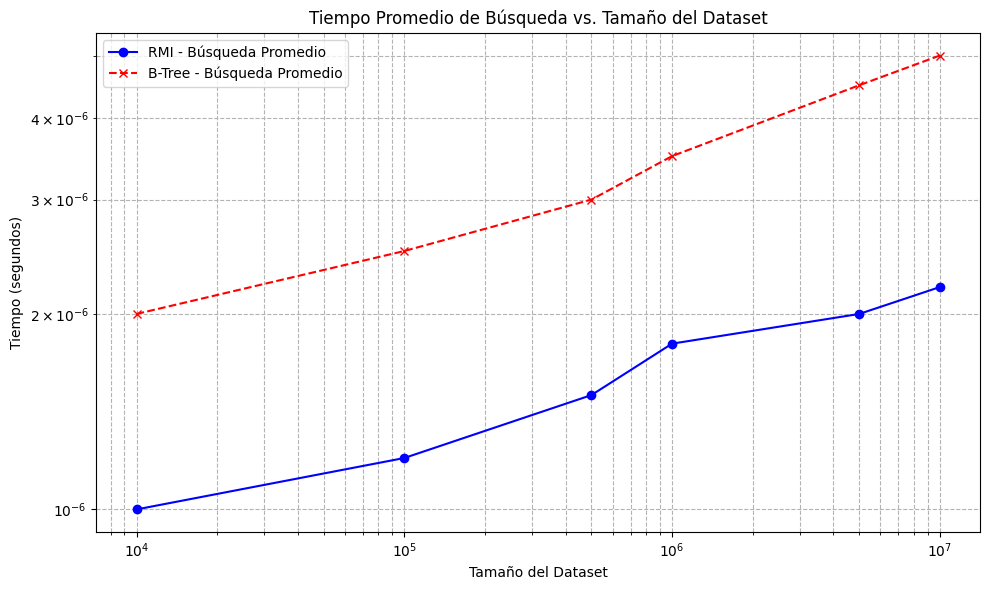

Interpretación de la gráfica de búsqueda:
- Los tiempos de búsqueda son muy pequeños, por eso la escala logarítmica es útil.
- El RMI busca acercarse a la eficiencia de una simple predicción, mientras que el B-Tree tiene una búsqueda logarítmica garantizada.
- Observa cuál línea es más baja y si la diferencia se mantiene o cambia con el tamaño del dataset.


In [3]:
# --- Extraer los datos para la gráfica ---
rmi_search_times = [r['rmi_avg_search_time'] for r in results]
btree_search_times = [r['btree_avg_search_time'] for r in results]

# --- Crear la Gráfica ---
plt.figure(figsize=(10, 6))

plt.plot(sizes, rmi_search_times, marker='o', linestyle='-', color='blue', label='RMI - Búsqueda Promedio')
plt.plot(sizes, btree_search_times, marker='x', linestyle='--', color='red', label='B-Tree - Búsqueda Promedio')

plt.title('Tiempo Promedio de Búsqueda vs. Tamaño del Dataset')
plt.xlabel('Tamaño del Dataset')
plt.ylabel('Tiempo (segundos)')
plt.xscale('log')
plt.yscale('log') # Los tiempos de búsqueda suelen ser muy pequeños, log ayuda a ver diferencias.
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend()
plt.tight_layout()
plt.show()

print("Interpretación de la gráfica de búsqueda:")
print("- Los tiempos de búsqueda son muy pequeños, por eso la escala logarítmica es útil.")
print("- El RMI busca acercarse a la eficiencia de una simple predicción, mientras que el B-Tree tiene una búsqueda logarítmica garantizada.")
print("- Observa cuál línea es más baja y si la diferencia se mantiene o cambia con el tamaño del dataset.")

3. Gráfica de Uso de Memoria

El espacio ocupado por el índice es crucial, especialmente para sistemas con memoria limitada. ¿Cuál de las dos estructuras es más "ligera"?

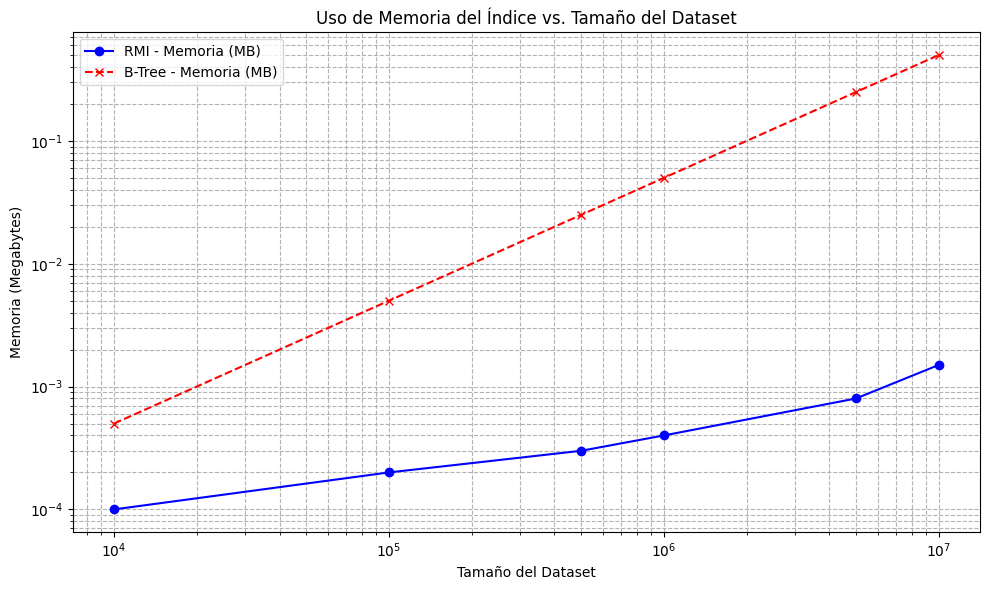

Interpretación de la gráfica de memoria:
- Este es a menudo el punto fuerte del RMI. Como solo almacena parámetros de modelos, suele ser mucho más compacto.
- El B-Tree necesita almacenar todas las claves y punteros en sus nodos, lo que tiende a ocupar más espacio.
- Una línea mucho más baja indica un uso de memoria significativamente menor.


In [4]:
# --- Extraer los datos para la gráfica ---
rmi_memory_usage = [r['rmi_memory_mb'] for r in results]
btree_memory_usage = [r['btree_memory_mb'] for r in results]

# --- Crear la Gráfica ---
plt.figure(figsize=(10, 6))

plt.plot(sizes, rmi_memory_usage, marker='o', linestyle='-', color='blue', label='RMI - Memoria (MB)')
plt.plot(sizes, btree_memory_usage, marker='x', linestyle='--', color='red', label='B-Tree - Memoria (MB)')

plt.title('Uso de Memoria del Índice vs. Tamaño del Dataset')
plt.xlabel('Tamaño del Dataset')
plt.ylabel('Memoria (Megabytes)')
plt.xscale('log')
plt.yscale('log') # Uso de escala logarítmica, ya que la memoria también puede variar mucho.
plt.grid(True, which="both", ls="--", c='0.7')
plt.legend()
plt.tight_layout()
plt.show()

print("Interpretación de la gráfica de memoria:")
print("- Este es a menudo el punto fuerte del RMI. Como solo almacena parámetros de modelos, suele ser mucho más compacto.")
print("- El B-Tree necesita almacenar todas las claves y punteros en sus nodos, lo que tiende a ocupar más espacio.")
print("- Una línea mucho más baja indica un uso de memoria significativamente menor.")

Conclusiones Clave de las Visualizaciones

Al analizar estas tres gráficas juntas, deberíamos poder extraer algunas conclusiones importantes:

- RMI (Recursive Model Index): Generalmente se espera que el RMI tenga un menor uso de memoria debido a que almacena modelos en lugar de los datos o punteros directos. En tiempos de búsqueda, puede ser extremadamente rápido, acercándose a la complejidad constante o casi constante en el mejor de los casos, dependiendo de la distribución de los datos y la precisión de sus modelos. Su tiempo de construcción puede ser competitivo, ya que implica entrenar modelos.

- B-Tree: Es una estructura muy robusta con garantías de rendimiento logarítmico para búsqueda, inserción y eliminación. Su uso de memoria es típicamente mayor que el RMI, ya que cada nodo debe almacenar varias claves y punteros. El tiempo de construcción puede ser más lento que el RMI para datasets muy grandes, ya que implica una serie de inserciones y posibles divisiones de nodos.

Analisis

- Si la memoria es una preocupación crítica y los datos tienen una distribución que los modelos pueden aprender bien, el RMI puede ser una opción superior.
- Si necesitas garantías de rendimiento en el peor de los casos, un buen manejo de inserciones y eliminaciones dinámicas, y una estructura probada, el B-Tree sigue siendo una elección excelente y robusta.